# exploratory data analysis

In [1]:
import pandas as pd
pd.__version__
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = "../nowdata/charters_2015.pkl"
rawdta = pd.read_pickle(file)

In [4]:
def is_empty_list(series):
    """
    Args: Pandas Series of list
    Returns: a list contain Boolean value indicating whether the list is empty or not
    """
    lst = []
    for element in series:
        if len(element) == 0:
            lst.append(False)
        else:
            lst.append(True)
    return lst

In [5]:
#data cleaning
#rawdta.dropna(axis = 0, how = 'any')
rawdta['constant'] = 1
rawdta = rawdta.loc[is_empty_list(rawdta['WEBTEXT']), :] #delete those with empty webtext

In [6]:
len(rawdta)

8714

In [9]:
rawdta.shape

(8714, 681)

In [10]:
rawdta[''].isna().sum()

NCESSCH                       0
CMO_NAME                   4424
CMO_MEMSUM                 4424
SCH_NAME                   4424
CMO_STATE                  4444
CMO_SCHNUM                 4424
CMO_URL                    4424
CMO_NUMSTATES              4448
CMO_ALLSTATES              4448
CMO_SECTOR                 5738
CMO_NUMSTUDENTS_CREDO17    5762
CMO_TYPE                   4773
CMO_WEBTEXT                   0
SURVYEAR                    398
FIPST                       398
STABR                       398
SEANAME                     398
LEAID                         0
ST_LEAID                    398
SCHID                       398
ST_SCHID                    398
MSTREET1                    398
MSTREET2                   8440
MSTREET3                   8713
MCITY                       398
MSTATE                      398
MZIP                        398
MZIP4                      5149
PHONE                       398
LSTREET1                    398
                           ... 
TOT_SSPA

In [11]:
list(rawdta.columns)

['NCESSCH',
 'CMO_NAME',
 'CMO_MEMSUM',
 'SCH_NAME',
 'CMO_STATE',
 'CMO_SCHNUM',
 'CMO_URL',
 'CMO_NUMSTATES',
 'CMO_ALLSTATES',
 'CMO_SECTOR',
 'CMO_NUMSTUDENTS_CREDO17',
 'CMO_TYPE',
 'CMO_WEBTEXT',
 'SURVYEAR',
 'FIPST',
 'STABR',
 'SEANAME',
 'LEAID',
 'ST_LEAID',
 'SCHID',
 'ST_SCHID',
 'MSTREET1',
 'MSTREET2',
 'MSTREET3',
 'MCITY',
 'MSTATE',
 'MZIP',
 'MZIP4',
 'PHONE',
 'LSTREET1',
 'LSTREET2',
 'LSTREET3',
 'LCITY',
 'LSTATE',
 'LZIP',
 'LZIP4',
 'UNION',
 'OUT_OF_STATE_FLAG',
 'SCH_TYPE_TEXT',
 'SCH_TYPE',
 'RECON_STATUS',
 'GSLO',
 'GSHI',
 'LEVEL',
 'VIRTUAL',
 'BIES',
 'SY_STATUS_TEXT',
 'SY_STATUS',
 'UPDATED_STATUS_TEXT',
 'UPDATED_STATUS',
 'EFFECTIVE_DATE',
 'CHARTER_TEXT',
 'G13OFFERED',
 'AEOFFERED',
 'UGOFFERED',
 'NOGRADES',
 'CHARTAUTH1',
 'CHARTAUTHN1',
 'CHARTAUTH2',
 'CHARTAUTHN2',
 'IGOFFERED',
 'WEBSITE',
 'FRELCH',
 'REDLCH',
 'AE',
 'TOTAL',
 'AM',
 'AMALM',
 'AMALF',
 'AS',
 'ASALM',
 'ASALF',
 'HI',
 'HIALM',
 'HIALF',
 'BL',
 'BLALM',
 'BLALF',
 'WH',


# Regress on ESS_STR

In [7]:
# Regress '% Total Population: White Alone'
#         "% Population 25 Years and Over: Bachelor's Degree",
#         '% Civilian Population in Labor Force 16 Years and Over: Unemployed'
#         '% Families: Income in Below Poverty Level'
#         '% Total Population: Foreign Born'
#         'Population Density (Per Sq. Mile)'
#         'constant'
# On      'ESS_STR'  measurement of the magnitude of traditionism
OLS1_dta = rawdta[['ESS_STR','% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
OLS1_dta = OLS1_dta.dropna(how = "any")
Y = OLS1_dta['ESS_STR']
X = OLS1_dta[['% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ESS_STR   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     75.60
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           1.47e-88
Time:                        21:27:47   Log-Likelihood:                -5534.8
No. Observations:                3217   AIC:                         1.108e+04
Df Residuals:                    3210   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0017      0.002     -0.925      0.355      -0.005       0.002
% Population 25 Years and Over: Bachelor's Degree                      0.0011      0.006      0.192      0.848      -0.010       0.012
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0240      0.012      1.991      0.047       0.000       0.048
% Families: Income in Below Poverty Level                             -0.0091      0.006     -1.399      0.162      -0.022       0.004
% Total Population: Foreign Born                                      -0.0333      0.002    -18.501      0.000      -0.037      -0.030
Population Density (Per Sq. Mile)                                      0.0001   1.04e-05     11.040      0.000    9.44e-05       0.000
constant                                                              -3.2617      0.264    -12.359      0.000      -3.779      -2.744
==============================================================================
Omnibus:                      337.838   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.271
Skew:                          -0.760   Prob(JB):                     1.94e-77
Kurtosis:                       2.427   Cond. No.                     4.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

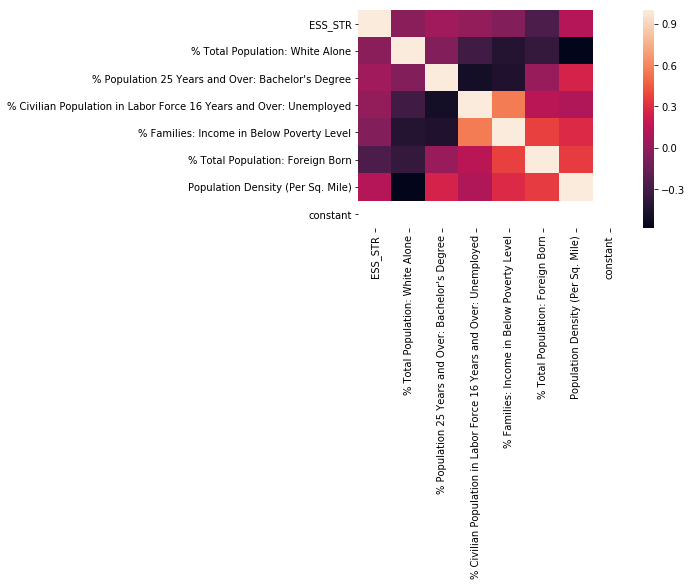

In [8]:
#check for multi-colinearity
corr = OLS1_dta.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

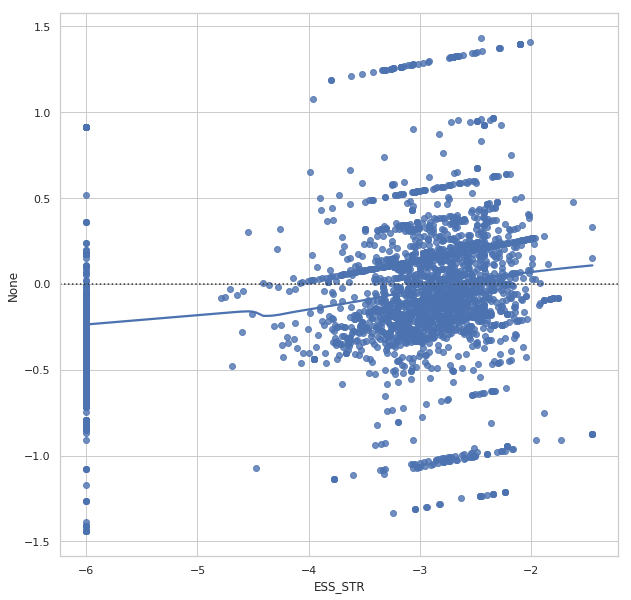

In [9]:
#check for heteroskedasticity
sns.set(style="whitegrid")
plt.figure(figsize = (10,10))
sns.residplot(Y, results.resid, lowess=True, color="b")

# Regress on PROG_STR

In [10]:
OLS2_dta = rawdta[['PROG_STR','% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
OLS2_dta = OLS2_dta.dropna(how = "any")
Y2 = OLS2_dta['PROG_STR']
X2 = OLS2_dta[['% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
results2 = sm.OLS(Y2, X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PROG_STR   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     99.60
Date:                Wed, 03 Oct 2018   Prob (F-statistic):          3.20e-115
Time:                        21:27:49   Log-Likelihood:                -5462.1
No. Observations:                3217   AIC:                         1.094e+04
Df Residuals:                    3210   BIC:                         1.098e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0024      0.002     -1.340      0.180      -0.006       0.001
% Population 25 Years and Over: Bachelor's Degree                     -0.0010      0.005     -0.176      0.860      -0.012       0.010
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0033      0.012      0.281      0.779      -0.020       0.026
% Families: Income in Below Poverty Level                             -0.0188      0.006     -2.970      0.003      -0.031      -0.006
% Total Population: Foreign Born                                      -0.0379      0.002    -21.513      0.000      -0.041      -0.034
Population Density (Per Sq. Mile)                                      0.0001   1.02e-05     10.461      0.000    8.64e-05       0.000
constant                                                              -2.6574      0.258    -10.299      0.000      -3.163      -2.151
==============================================================================
Omnibus:                      324.385   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.397
Skew:                          -0.886   Prob(JB):                     2.56e-93
Kurtosis:                       2.801   Cond. No.                     4.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

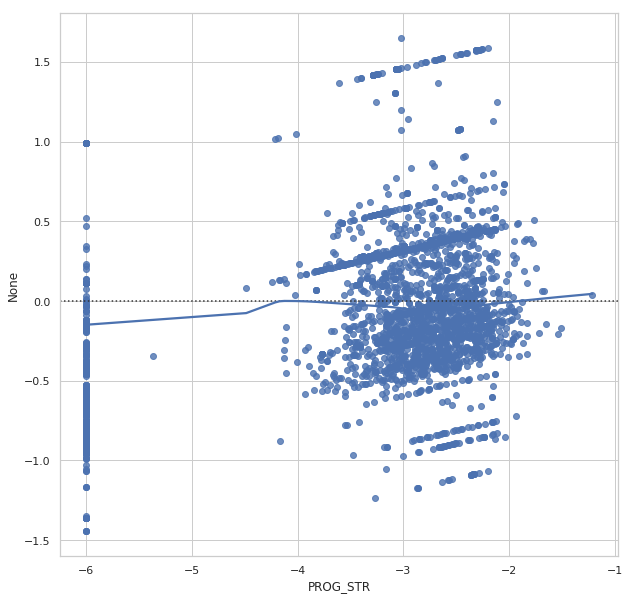

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize = (10,10))
sns.residplot(Y2, results2.resid, lowess=True, color="b")

# More Variables

In [15]:
OLS3_dta = rawdta[['PROG_STR','% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', 'LEAID', 'STABR', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)', 'DISC_STR', 'INQU_STR', 'constant']]

#OLS3_dta = OLS3_dta.dropna(how = "any")

In [ ]:
Y3 = OLS3_dta['DISC_STR']
X3 = OLS3_dta[['% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
results3 = sm.OLS(Y3.astype(float), X3.astype(float)).fit()
results3.summary()

In [7]:
OLS4_dta = rawdta[['ESS_STR','% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16',\
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','DISC_STR', 'INQU_STR','constant']]
OLS4_dta = OLS4_dta.dropna(how = "any")
Y4 = OLS4_dta['INQU_STR']
X4 = OLS4_dta[['% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
results4 = sm.OLS(Y4.astype(float), X4.astype(float)).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               INQU_STR   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     70.19
Date:                Thu, 04 Oct 2018   Prob (F-statistic):          3.96e-172
Time:                        00:53:35   Log-Likelihood:                -5190.1
No. Observations:                2938   AIC:                         1.041e+04
Df Residuals:                    2923   BIC:                         1.050e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                        0.0018      0.002      0.771      0.441      -0.003       0.006
% Population 25 Years and Over: Bachelor's Degree                     -0.0303      0.007     -4.581      0.000      -0.043      -0.017
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0106      0.014      0.774      0.439      -0.016       0.037
% Families: Income in Below Poverty Level                              0.0368      0.009      3.977      0.000       0.019       0.055
% Total Population: Foreign Born                                      -0.0544      0.002    -22.482      0.000      -0.059      -0.050
Population Density (Per Sq. Mile)                                      0.0001   1.26e-05     10.406      0.000       0.000       0.000
STR                                                                    0.0002      0.000      1.105      0.269      -0.000       0.000
PCTETH                                                                -0.0536      0.143     -0.376      0.707      -0.333       0.226
PCTFRL                                                                -0.2591      0.095     -2.731      0.006      -0.445      -0.073
MEMBER                                                                 0.0001   5.21e-05      2.191      0.029     1.2e-05       0.000
AGE                                                                    0.0083      0.005      1.589      0.112      -0.002       0.018
SD_lv_PVI_2017                                                        -0.0013      0.003     -0.396      0.692      -0.008       0.005
close_rate16                                                          -1.0117      1.052     -0.961      0.337      -3.075       1.052
Median Household Income (In 2016 Inflation Adjusted Dollars)        2.501e-05   3.09e-06      8.088      0.000    1.89e-05    3.11e-05
constant                                                              -3.0932      0.384     -8.059      0.000      -3.846      -2.341
==============================================================================
Omnibus:                      586.352   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.214
Skew:                          -1.260   Prob(JB):                    3.98e-228
Kurtosis:                       4.485   Cond. No.                     2.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there 

In [9]:
X5 = OLS3_dta[['% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
Y5 = OLS3_dta[['DISC_STR']]

md =  sm.regression.mixed_linear_model.MixedLM(Y5.astype(float), X5.astype(float), groups=OLS3_dta['LEAID']).fit()
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Mixed Linear Model Regression Results
=============================================================================================================
Model:                               MixedLM                  Dependent Variable:                  DISC_STR  
No. Observations:                    2938                     Method:                              REML      
No. Groups:                          650                      Scale:                               1.9050    
Min. group size:                     1                        Likelihood:                          -5278.0594
Max. group size:                     281                      Converged:                           Yes       
Mean group size:                     4.5                                                                     
-------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                    -0.000    0.003 -0.090 0.928 -0.007  0.006
% Population 25 Years and Over: Bachelor's Degree                  -0.007    0.008 -0.807 0.420 -0.023  0.010
% Civilian Population in Labor Force 16 Years and Over: Unemployed  0.007    0.016  0.437 0.662 -0.024  0.038
% Families: Income in Below Poverty Level                           0.016    0.012  1.341 0.180 -0.007  0.039
% Total Population: Foreign Born                                   -0.010    0.005 -1.878 0.060 -0.021  0.000
Population Density (Per Sq. Mile)                                   0.000    0.000  0.610 0.542 -0.000  0.000
STR                                                                 0.000    0.000  2.540 0.011  0.000  0.001
PCTETH                                                             -0.115    0.158 -0.731 0.465 -0.425  0.194
PCTFRL                                                             -0.327    0.103 -3.173 0.002 -0.529 -0.125
MEMBER                                                              0.000    0.000  5.706 0.000  0.000  0.000
AGE                                                                 0.006    0.006  1.103 0.270 -0.005  0.017
SD_lv_PVI_2017                                                     -0.001    0.004 -0.151 0.880 -0.009  0.007
close_rate16                                                        0.840    1.226  0.685 0.493 -1.564  3.243
Median Household Income (In 2016 Inflation Adjusted Dollars)        0.000    0.000  0.635 0.525 -0.000  0.000
constant                                                           -3.394    0.509 -6.671 0.000 -4.391 -2.397
Group Var                                                           0.243    0.033                           
=============================================================================================================

"""

In [48]:
X6 = OLS3_dta[['% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
Y6 = OLS3_dta[['DISC_STR']]

md6 =  sm.regression.mixed_linear_model.MixedLM(Y6.astype(float), X6.astype(float), groups=OLS3_dta['STABR']).fit()
md6.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Mixed Linear Model Regression Results
==============================================================================================================
Model:                              MixedLM                   Dependent Variable:                   PROG_STR  
No. Observations:                   2938                      Method:                               REML      
No. Groups:                         24                        Scale:                                1.6333    
Min. group size:                    3                         Likelihood:                           -4974.6600
Max. group size:                    1031                      Converged:                            Yes       
Mean group size:                    122.4                                                                     
--------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                    -0.007    0.003  -2.550 0.011 -0.012 -0.002
% Population 25 Years and Over: Bachelor's Degree                  -0.001    0.007  -0.079 0.937 -0.014  0.013
% Civilian Population in Labor Force 16 Years and Over: Unemployed -0.034    0.014  -2.446 0.014 -0.062 -0.007
% Families: Income in Below Poverty Level                           0.001    0.009   0.084 0.933 -0.017  0.019
% Total Population: Foreign Born                                   -0.034    0.003 -13.041 0.000 -0.039 -0.029
Population Density (Per Sq. Mile)                                   0.000    0.000   6.679 0.000  0.000  0.000
STR                                                                 0.000    0.000   0.366 0.714 -0.000  0.000
PCTETH                                                             -0.327    0.136  -2.405 0.016 -0.594 -0.061
PCTFRL                                                             -0.284    0.089  -3.202 0.001 -0.458 -0.110
MEMBER                                                              0.000    0.000   1.556 0.120 -0.000  0.000
AGE                                                                 0.002    0.005   0.353 0.724 -0.008  0.011
SD_lv_PVI_2017                                                      0.005    0.003   1.635 0.102 -0.001  0.011
close_rate16                                                        1.244    0.961   1.295 0.195 -0.638  3.127
Median Household Income (In 2016 Inflation Adjusted Dollars)       -0.000    0.000  -0.803 0.422 -0.000  0.000
constant                                                           -2.003    0.412  -4.856 0.000 -2.811 -1.194
Group Var                                                           0.147    0.051                            
==============================================================================================================

"""

In [10]:
len(OLS3_dta['STABR'].unique())
#sanity check, unique value in STABR

24

In [14]:
Y8 = OLS3_dta[['INQU_STR']]
Y8.head()

INQU_STR
2 -1.921361
3 -1.619601
4 -1.852022
8 -1.617361
9 -6.000000

In [15]:
md8 = sm.regression.mixed_linear_model.MixedLM(Y8.astype(float), X5.astype(float), groups=OLS3_dta['LEAID']).fit()
md8.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Mixed Linear Model Regression Results
=============================================================================================================
Model:                               MixedLM                  Dependent Variable:                  INQU_STR  
No. Observations:                    2938                     Method:                              REML      
No. Groups:                          650                      Scale:                               1.6931    
Min. group size:                     1                        Likelihood:                          -5148.2111
Max. group size:                     281                      Converged:                           No        
Mean group size:                     4.5                                                                     
-------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                     0.009    0.004  2.517 0.012  0.002  0.016
% Population 25 Years and Over: Bachelor's Degree                  -0.006    0.009 -0.727 0.467 -0.023  0.011
% Civilian Population in Labor Force 16 Years and Over: Unemployed  0.020    0.016  1.225 0.220 -0.012  0.051
% Families: Income in Below Poverty Level                           0.002    0.012  0.139 0.889 -0.022  0.025
% Total Population: Foreign Born                                   -0.009    0.006 -1.574 0.115 -0.021  0.002
Population Density (Per Sq. Mile)                                   0.000    0.000  2.209 0.027  0.000  0.000
STR                                                                 0.000    0.000  1.268 0.205 -0.000  0.000
PCTETH                                                              0.316    0.155  2.045 0.041  0.013  0.619
PCTFRL                                                             -0.348    0.099 -3.499 0.000 -0.542 -0.153
MEMBER                                                              0.000    0.000  3.097 0.002  0.000  0.000
AGE                                                                 0.002    0.005  0.379 0.705 -0.008  0.012
SD_lv_PVI_2017                                                     -0.001    0.004 -0.278 0.781 -0.009  0.007
close_rate16                                                       -0.088    1.242 -0.071 0.944 -2.521  2.345
Median Household Income (In 2016 Inflation Adjusted Dollars)        0.000    0.000  0.630 0.529 -0.000  0.000
constant                                                           -2.993    0.526 -5.690 0.000 -4.024 -1.962
Group Var                                                           0.359    0.064                           
=============================================================================================================

"""

In [17]:
md9 = sm.regression.mixed_linear_model.MixedLM(Y8.astype(float), X5.astype(float), groups=OLS3_dta['STABR']).fit()
md9.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Mixed Linear Model Regression Results
==============================================================================================================
Model:                              MixedLM                   Dependent Variable:                   INQU_STR  
No. Observations:                   2938                      Method:                               REML      
No. Groups:                         24                        Scale:                                1.8903    
Min. group size:                    3                         Likelihood:                           -5187.2786
Max. group size:                    1031                      Converged:                            Yes       
Mean group size:                    122.4                                                                     
--------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                    -0.005    0.003  -1.722 0.085 -0.010  0.001
% Population 25 Years and Over: Bachelor's Degree                  -0.010    0.007  -1.336 0.181 -0.024  0.004
% Civilian Population in Labor Force 16 Years and Over: Unemployed -0.030    0.015  -1.954 0.051 -0.059  0.000
% Families: Income in Below Poverty Level                           0.008    0.010   0.798 0.425 -0.011  0.027
% Total Population: Foreign Born                                   -0.053    0.003 -18.925 0.000 -0.058 -0.047
Population Density (Per Sq. Mile)                                   0.000    0.000   6.865 0.000  0.000  0.000
STR                                                                 0.000    0.000   1.013 0.311 -0.000  0.000
PCTETH                                                              0.223    0.146   1.528 0.126 -0.063  0.510
PCTFRL                                                             -0.424    0.095  -4.443 0.000 -0.610 -0.237
MEMBER                                                              0.000    0.000   2.954 0.003  0.000  0.000
AGE                                                                 0.001    0.005   0.279 0.780 -0.009  0.012
SD_lv_PVI_2017                                                      0.008    0.003   2.488 0.013  0.002  0.015
close_rate16                                                       -0.300    1.033  -0.290 0.772 -2.325  1.726
Median Household Income (In 2016 Inflation Adjusted Dollars)        0.000    0.000   0.222 0.824 -0.000  0.000
constant                                                           -1.112    0.445  -2.500 0.012 -1.983 -0.240
Group Var                                                           0.148    0.044                            
==============================================================================================================

"""